In [29]:
import numpy as np
import matplotlib.pyplot as plt

import limpy.theory as lt
import limpy.lines as ll
import limpy.params as p
import limpy.utils as lu
from limpy.plotsettings import *

import matplotlib as mpl
#mpl.style.use("seaborn-bright")
#mpl.use('Agg')
mpl.rcParams['text.usetex'] = True 

### Find the model names 

In [30]:
# Check first what are the available models of star formation rate
# sfr_model: available star formation model
# models: Models that convert sfr to line luminosities
sfr_model, line_lum_models = p.model_avail(line_name="CII158")
print("Available models for sfr --->", sfr_model)

print("Available models for sfr --->", line_lum_models)

Available models for sfr ---> ['Behroozi19', 'Tng300', 'Tng100', 'Silva15', 'Fonseca16']
Available models for sfr ---> ['Visbal10', 'Silva15-m1', 'Silva15-m2', 'Silva15-m3', 'Silva15-m4', 'Padmanabhan18', 'Fonseca16', 'Lagache18', 'Schaerer20', 'Alma_scalling']


### Calculate Clustering, shot noise, and total power spectrum  based on Halo model

In [31]:
import time
times =time.time()
z= 5.8
k= np.logspace(-2, 1, num =100)
line_name="CII158"
sfr_model="Behroozi19"
model_name = "Fonseca16"


print("=====> Calculating the shot noise term <=====")
pk_shot=lt.Pk_line(k, z, line_name=line_name,
                                     model_name= model_name, 
                                     label="shot", pk_unit='intensity')


print("=====> Calculating the Clustering term <=====")
pk_clustering=lt.Pk_line(k, z, line_name=line_name,
                                     model_name= model_name, 
                                     label="clustering", pk_unit='intensity')

print("=====> Calculating Total power spectrum <=====")
pk_theory=lt.Pk_line(k, z, line_name=line_name,
                                     model_name= model_name, 
                                     label="total", pk_unit='intensity')

timee =time.time()

print("time taken", (timee-times))

=====> Calculating the shot noise term <=====
=====> Calculating the Clustering term <=====
=====> Calculating Total power spectrum <=====
time taken 3.5787930488586426


### plot the powerspectrum

(0.01, 10.0)

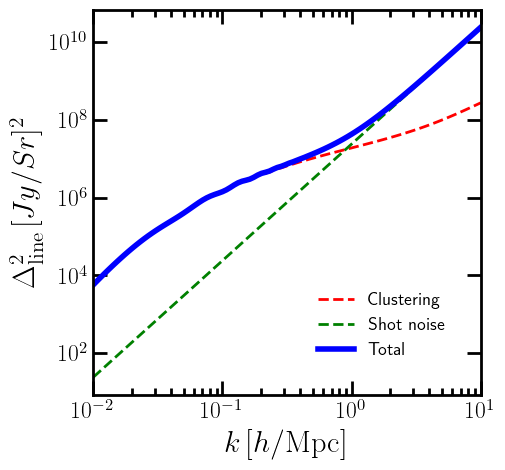

In [18]:
# plot the power spectrum based on halo model

fig = plt.figure(figsize=(5, 5), dpi=100)
ax=fig.add_subplot(111)

plt.loglog(k, lu.dk(k, pk_clustering), lw=2, color ="r", ls ="--", label ="Clustering")
plt.loglog(k, lu.dk(k, pk_shot), lw=2,  color ="g", ls ="--", label ="Shot noise")
plt.loglog(k, lu.dk(k, pk_theory), lw=4, color ="b", label ="Total")

plt.ylabel(r"$\Delta^2_{\rm line} \, [Jy/Sr]^2$")
plt.xlabel(r"$k\, [h/\mathrm{Mpc}]$")

plt.legend(loc=4, frameon=False)

plt.xlim( 1e-2, 1e1)

### plot halo mass function that is used to calculate the power spectra

In [19]:
z = 2
Mmin = 1e9
Mmax= 1e15
mass, mass_func = lt.hmf(z, Mmin=Mmin, Mmax=Mmax)

(1000000000.0, 1000000000000000.0)

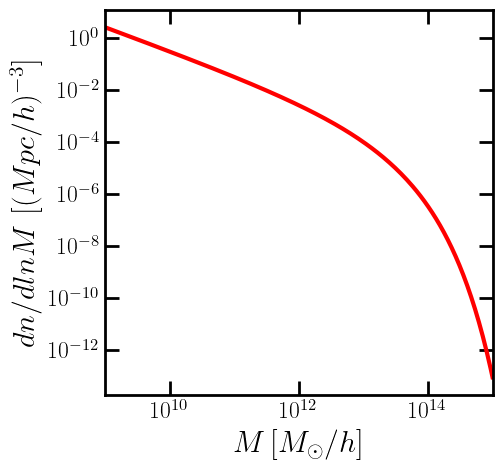

In [20]:
fig = plt.figure(figsize=(5, 5), dpi=100)
ax=fig.add_subplot(111)

plt.loglog(mass, mass_func, lw=3, color ="red")

plt.ylabel(r"$dn/dlnM \,\,[(Mpc/h)^{-3}]$")
plt.xlabel(r"$M\, [M_\odot/h]$")

plt.xlim( 1e9, 1e15)

### calculate and plot intensity of lines

In [21]:
zarray = np.linspace(0,7, num=50)
Iz = [lt.I_line(z, line_name="CII158", model_name="Fonseca16", sfr_model="Behroozi19") 
                for z in zarray]

(0.0, 7.0)

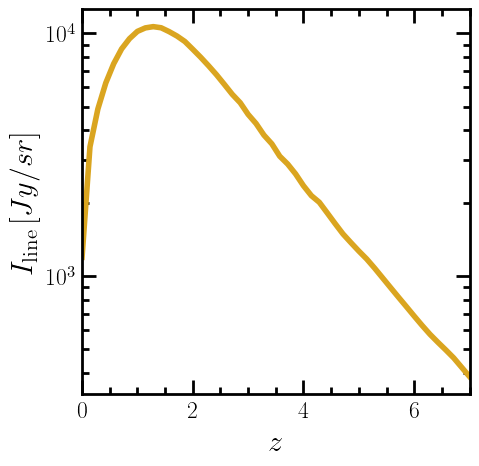

In [22]:

fig = plt.figure(figsize=(5, 5), dpi=100)
ax=fig.add_subplot(111)

plt.semilogy(zarray, Iz, lw=4, color = "goldenrod")

plt.ylabel(r"$I_{\rm line}\, [Jy/sr]$")
plt.xlabel(r"$z$")

plt.xlim(0, 7)

### calculate and plot bias of line intensities

In [23]:
zarray = np.linspace(0,7, num=50)
bz = [lt.b_line(z, line_name="CII158", model_name="Fonseca16", sfr_model="Behroozi19") 
                for z in zarray]

(0.0, 7.0)

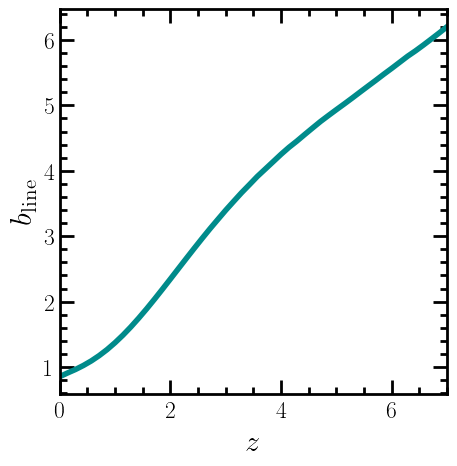

In [24]:

fig = plt.figure(figsize=(5, 5), dpi=100)
ax=fig.add_subplot(111)

plt.plot(zarray, bz, lw=4, color = "darkcyan")

plt.ylabel(r"$b_{\rm line}$")
plt.xlabel(r"$z$")

plt.xlim(0, 7)

In [27]:
z = 5.8
deltaz = 0.1

ells = np.linspace(2, 1e5, num=10) 
cls = lt.Cl_line(
    ells,
    z,
    deltaz,
    fduty=1.0,
    line_name="CII158",
    label="total",
    sfr_model="Silva15",
    model_name="Silva15-m1",
    pk_unit="temperature",
)

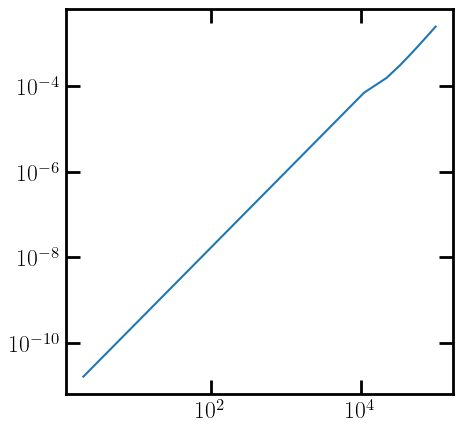

In [32]:
fig = plt.figure(figsize=(5, 5), dpi=100)
ax=fig.add_subplot(111)

plt.loglog(ells, ells * (ells+1) *1e12 * cls/2.0/np.pi)